# Employee Attrition Prediction with Sentiment Analysis

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py


from ggplot import *
from pandas.core import datetools

In [3]:
#loading the data
data1 = pd.read_csv('Data\DataSet1.csv')

In [3]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
3,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,...,3,80,0,8,2,2,7,7,3,6
4,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,...,1,80,3,12,3,2,1,0,0,0


In [14]:
data1.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [30]:
#verify number of rows/columns in the dataframe
print(data1.shape)
#First Exploratory analysis(numeric data)
print(data1.describe().shape)
data1.describe()

(1470, 33)
(8, 25)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The data set contains 1470 rows, each of which includes 34 variables of an employee. The column of "Attrition" is the label of employees about their employment status with the company. The other 33 variables are those which are considered relevant to the label variable. Both demographic data (e.g., gender, age, etc.), and sentiment data (e.g., job satisfaction, etc.) are included.

In [4]:
#loading the data
data2 = pd.read_csv('Data\DataSet2.csv')

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
Age                         500 non-null int64
Attrition                   500 non-null object
BusinessTravel              500 non-null object
DailyRate                   500 non-null int64
Department                  500 non-null object
DistanceFromHome            500 non-null int64
Education                   500 non-null object
EducationField              500 non-null object
EmployeeCount               500 non-null int64
EnvironmentSatisfaction     500 non-null int64
Gender                      500 non-null object
HourlyRate                  500 non-null int64
JobInvolvement              500 non-null int64
JobLevel                    500 non-null int64
JobRole                     500 non-null object
JobSatisfaction             500 non-null int64
MaritalStatus               500 non-null object
MonthlyIncome               500 non-null int64
MonthlyRate                 500 non-null 

In [31]:
#verify number of rows/columns in the dataframe
print(data1.shape)
#First Exploratory analysis(numeric data)
print(data2.describe().shape)
data1.describe()

(1470, 33)
(8, 24)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
data1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [33]:
data1['JobRole'].head(10)

0           Research Scientist
1           Research Scientist
2        Laboratory Technician
3        Laboratory Technician
4        Laboratory Technician
5        Laboratory Technician
6       Manufacturing Director
7    Healthcare Representative
8        Laboratory Technician
9        Laboratory Technician
Name: JobRole, dtype: object

    **2.1.2 Visualization of data
    Initial exploratory analysis can be performed to understand the data set
    for example:

1. the proportion of employees with different job titles (or any other possible factor) for status of **"attrition"** and **"non-attrition"** may vary, and this can be plotted as follows. People titled "Laboratory Technician", "Sales Executive", and "Research Scientist" are among the top 3 groups that exhibit highest attrition rate.

In [57]:
JobRole_table = pd.crosstab(index=data1["JobRole"], columns="count")
JobRole_table

col_0,count
JobRole,
Healthcare Representative,131
Human Resources,52
Laboratory Technician,259
Manager,102
Manufacturing Director,145
Research Director,80
Research Scientist,292
Sales Executive,326
Sales Representative,83


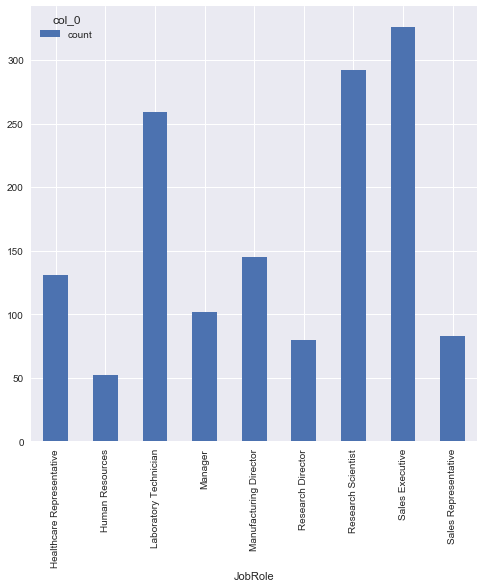

In [60]:
JobRole_table.plot(kind="bar",
                   figsize=(8,8))
plt.show()

1. monthly income, job level, and service year may affect decision of leaving for employees in different departments. For example, junior staffs with lower pay will be more likely to leave compared to those who are paid higher.

In [27]:
check = ((data1['YearsAtCompany'] >=2) & (data1['YearsAtCompany'] <= 5) & (data1['JobLevel'] < 3))

In [39]:
#ggplot(filter(data1, (data1['YearsAtCompany'] >=2) & (data1['YearsAtCompany'] <= 5) & (data1['JobLevel'] < 3)),
ggplot(filter(data1, check),
       aes(x = 'JobRole', y = 'MonthlyIncome')) +\
geom_boxplot()

AttributeError: 'filter' object has no attribute 'copy'

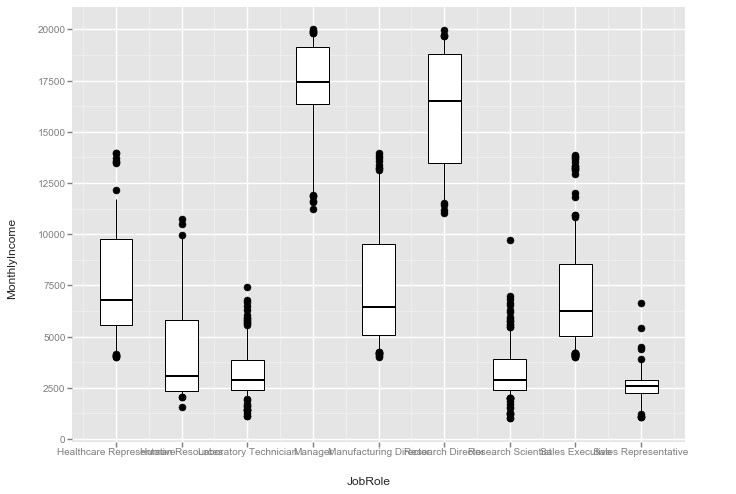

<ggplot: (51540600)>

In [27]:
#YearsAtCompany_table = data1['YearsAtCompany'] >=2
ggplot(data1, aes(x = 'JobRole', y = 'MonthlyIncome')) +\
geom_boxplot()

# Data Preprocessing

In [46]:
data1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [47]:
data1['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [57]:
data1['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [58]:
data1['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [59]:
data1['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [60]:
data1['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [61]:
data1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [62]:
data1['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [63]:
data1['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [68]:
data1['Attrition'] = pd.to_numeric(data1['Attrition'], errors='coerce').astype('category')
data1['BusinessTravel'] = pd.to_numeric(data1['BusinessTravel'], errors='coerce').astype('category')
data1['Department'] = pd.to_numeric(data1['Department'], errors='coerce').astype('category')
data1['Education'] = pd.to_numeric(data1['Education'], errors='coerce').astype('category')
data1['EducationField'] = pd.to_numeric(data1['EducationField'], errors='coerce').astype('category')
data1['Gender'] = pd.to_numeric(data1['Gender'], errors='coerce').astype('category')
data1['JobRole'] = pd.to_numeric(data1['JobRole'], errors='coerce').astype('category')
data1['MaritalStatus'] = pd.to_numeric(data1['MaritalStatus'], errors='coerce').astype('category')
data1['OverTime'] = pd.to_numeric(data1['OverTime'], errors='coerce').astype('category')

In [69]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').